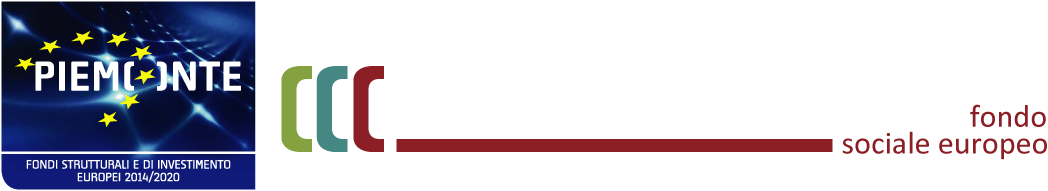





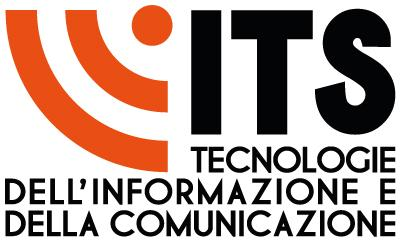




**Unità Formativa (UF):** AI e Machine Learning - Python

**Docente:** Fabio Giuseppe Antonio Gagliardi

**Titolo argomento:** esame di metà corso


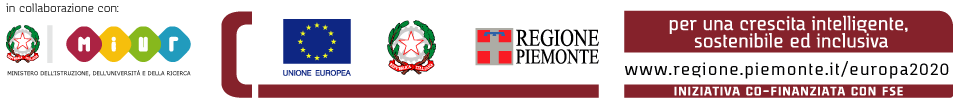



---



NOME:DARIO

\

COGNOME:OLIVO



---



# **REGOLE ESAME**

* **Commentare i passaggi importanti. Nello specifico:**
  *  **a cosa serve un blocco di codice, una classe o una funzione**
  *  **motivare le scelte effettuate nel codice.**

  * **L'ASSENZA DI COMMENTI SARÀ VALUTATA NEGATIVAMENTE**
  * **LE PROVE CHE DOVESSERO RIPORTARE GLI STESSI COMMENTI E LO STESSO CODICE COPIATO SARANNO VALUTATE NEGATIVAMENTE**

  es.

```
# Ho creato una classe Foo per questo motivo ...
# Funzione per calcolare ...
# Ho optato per questa soluzione piuttosto che ....
```
\

* **È richiesta la stesura di una legenda in quei grafici in cui non è chiara l'associazione della rappresentazione scelta con il dato.**

\

* **Si è liberi di utilizzare qualisasi strumento per rispondere alle richieste.
  Tuttavia si chiede di ricopiare in queso Notebook le risposte.
  Tutti i punti devono essere eseguiti nei corrispettivi blocchi senza errori.
  File diversi da questo Notebook verranno scartati.**




---



# **Descrizione dei dati**

**Dataset:**

-qualità vini bianchi

-qualità vini rossi

**link**
- vini bianchi: https://raw.githubusercontent.com/FabioGagliardiIts/datasets/main/wine_quality/winequality-white.csv
- vini rossi:https://raw.githubusercontent.com/FabioGagliardiIts/datasets/main/wine_quality/winequality-red.csv
**fonte:**
 Created by: Paulo Cortez (Univ. Minho), Antonio Cerdeira, Fernando Almeida, Telmo Matos and Jose Reis (CVRVV) @ 2009






# **Librerie**

Importare nel progetto le librerie necessarie allo svolgimento dell'esercizio.
  

In [104]:
#importo librerie
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import requests
import sqlite3
from io import StringIO
#from google.colab import files

# **Organizzazione e preparazione dei dati**


  Nel blocco di codice seguente andranno sviluppate tutte le strutture e le variabili globali da utlizzare nel resto del progetto.

  Viene lasciata totale libertà nell'organizzazione e nella preparazione dei dati. Qualsiasi cheet-sheet può essere usato come riferimento.
  

  



# **Descrizione dati**

   Input variables (based on physicochemical tests):
   
   1 - fixed acidity
   
   2 - volatile acidity
  
   3 - citric acid
  
   4 - residual sugar
  
   5 - chlorides
   
   6 - free sulfur dioxide
  
   7 - total sulfur dioxide
   
   8 - density
  
   9 - pH
  
   10 - sulphates
   
   11 - alcohol
  
   Output variable (based on sensory data):
   12 - quality (score between 0 and 10)



In [105]:

# Importazione degli url attraverso la libreria Request
vini_rossi= 'https://raw.githubusercontent.com/FabioGagliardiIts/datasets/main/wine_quality/winequality-red.csv'
vini_bianchi = 'https://raw.githubusercontent.com/FabioGagliardiIts/datasets/main/wine_quality/winequality-white.csv'

# Definizione delle GET attraverso la Requests per avere i dati
response_red = requests.get(vini_rossi)
response_white = requests.get(vini_bianchi)

# Controllo per vedere se le GET hanno avuto esito positivo o meno
if response_red.status_code == 200 and response_white.status_code == 200:
    df_rossi = pd.read_csv(StringIO(response_red.text), sep=';')
    df_bianchi = pd.read_csv(StringIO(response_white.text), sep=';')

    display(df_rossi)
    display(df_bianchi)
# Restituisce gli status code per gli URL se le richieste non vanno a buon fine
else:
    print('Errore. Status code (Primo URL):', response_red.status_code)
    print('Errore. Status code (Secondo URL):', response_white.status_code)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


*

# **Unione dataframes**



In [106]:
#creo copia sicurezza sulla quale lavoro
df_rossi_c = df_rossi.copy()
df_bianchi_c = df_bianchi.copy()

#poichè l'obiettivo della  nostra analisi è la predizione della qualità di un vino indipendentemente dal colore di esso
#decido di unire i dataframe
#decido perciò di assegnare il valore 0 ai vini rossi e 1 ai vini bianchi. Questi valori compariranno nella nuova colonna creata 'type'
df_rossi_c['type'] = 0
df_bianchi_c['type'] = 1

display(df_rossi_c)
display(df_bianchi_c)

#racchiudo i dataframe all'interno della variabile
data = [df_rossi_c, df_bianchi_c]

# unisco i due dataframe
#avendo risconrato più volte nello sviluppo del db del progetto partendo da un csv aggiungo anche 
# la proprietà ignore_index evita che si resetti l'id .
df_vini = pd.concat(data, ignore_index=True)


display(df_vini)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,0
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,0
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,0
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,0


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6,1
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6,1
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6,1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,1
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,1
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,1
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,1
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,1


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,1
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,1
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,1
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,1


In [107]:
#modifico i nomi per facilitare poi la creazione db
df_vini=df_vini.rename(columns={ 'fixed acidity':'fixed_acidity',
                                 'volatile acidity':'volatile_acidity',
                                 'citric acid':'citric_acid',
                                 'residual sugar':'residual_sugar',
                                 'free sulfur dioxide': 'free_sulfur_dioxide',
                                 'total sulfur dioxide': 'total_sulfur_dioxide',})
display(df_vini)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,1
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,1
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,1
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,1


# **Data Vidz**


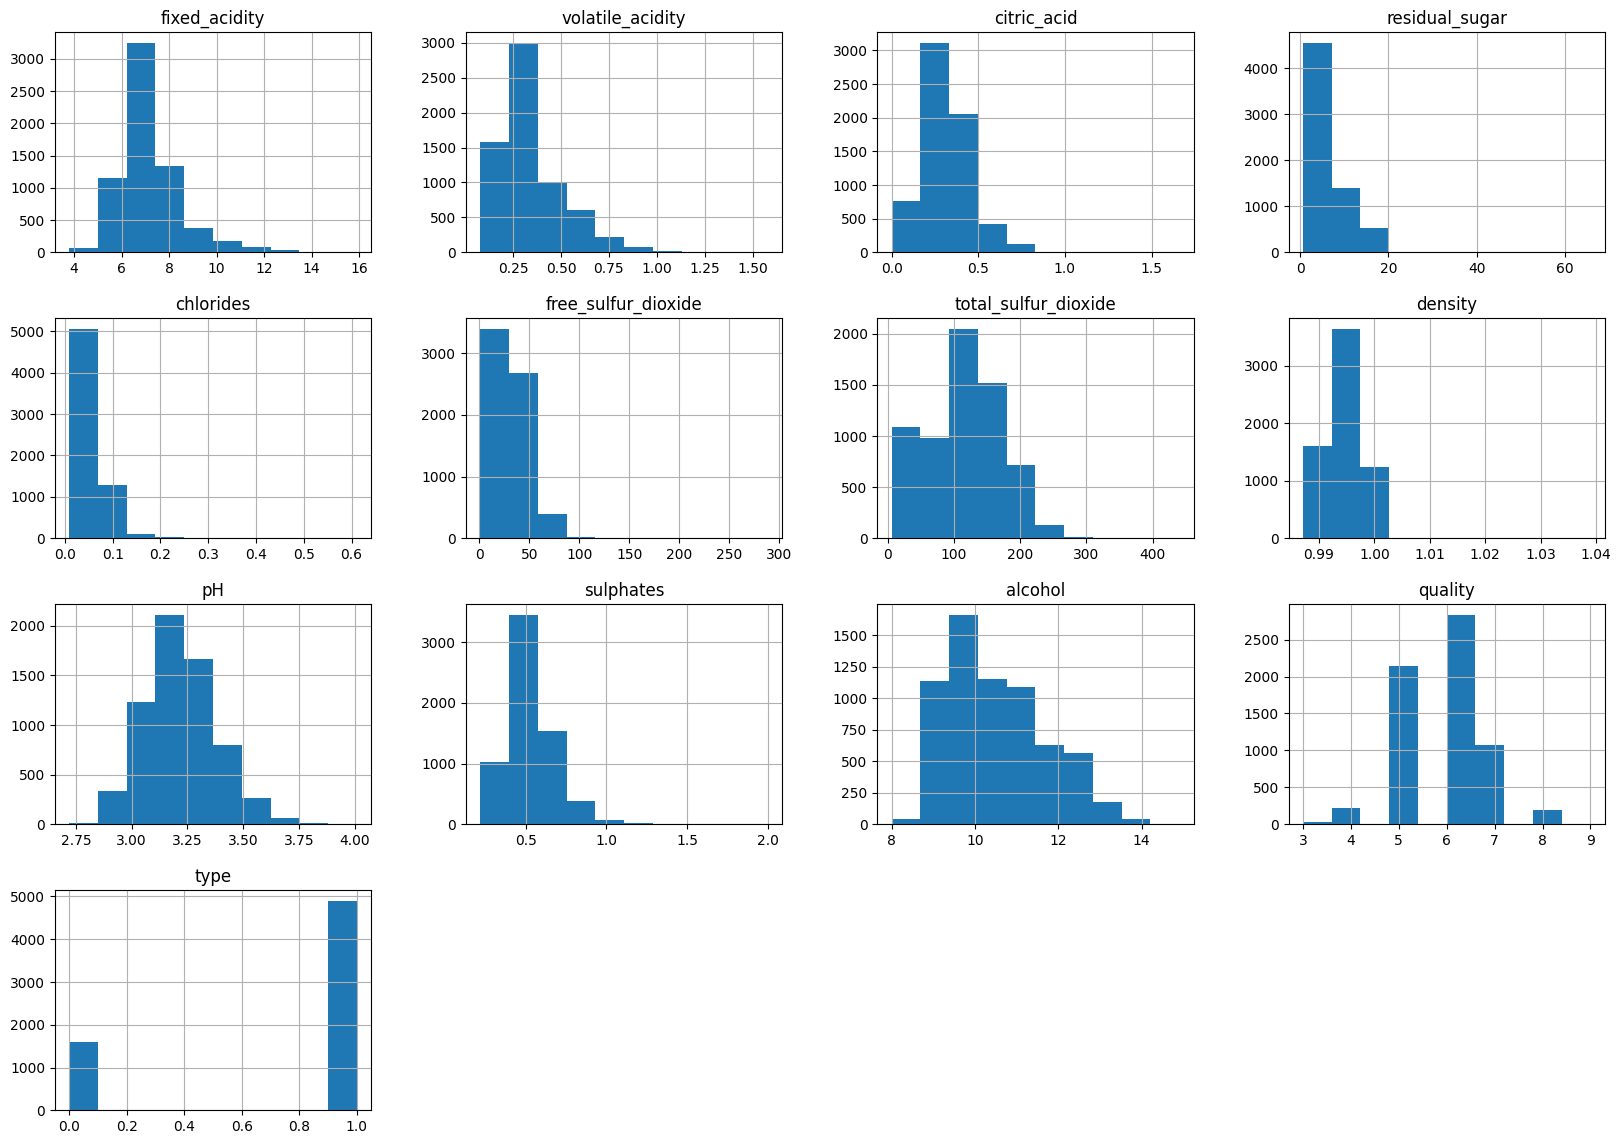

In [108]:
#eseguo data vidz per vedere come sono distribuiti i dati
df_vini.hist(figsize=(20,14))
plt.show()

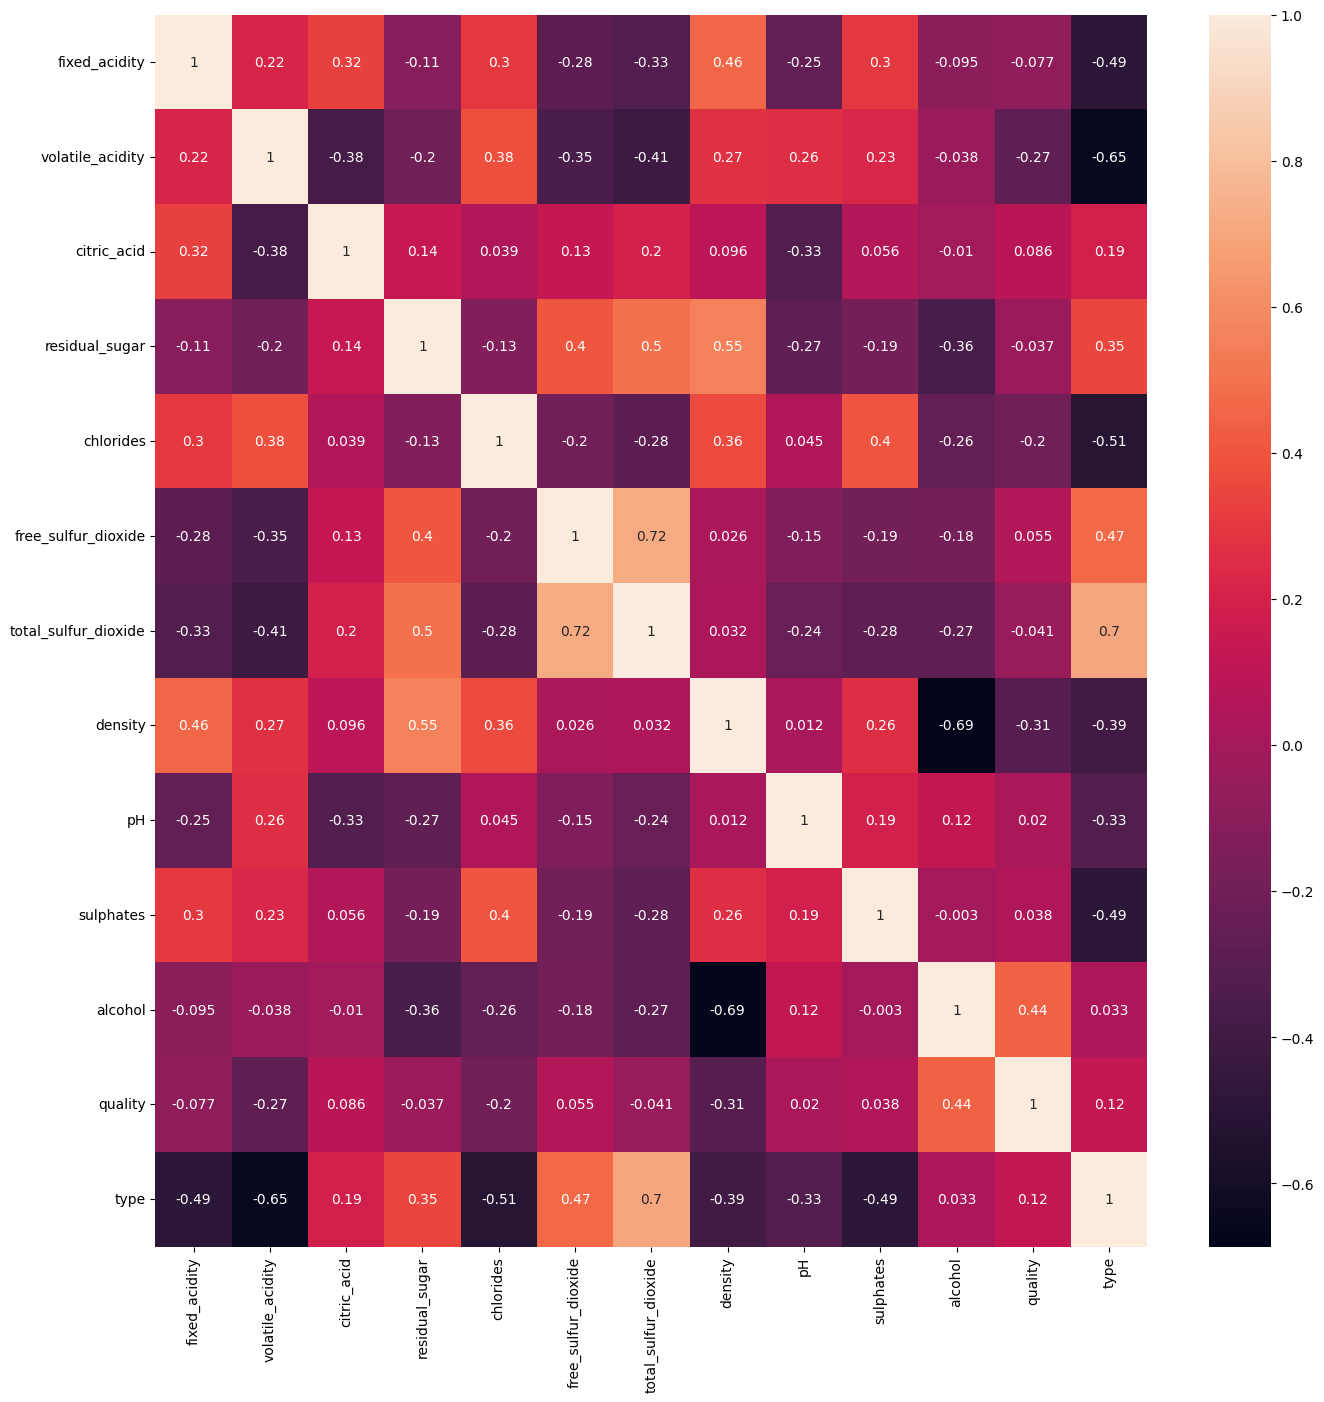

In [109]:
#calcolo matrice di correlazione per visualizzare la correlazione tra il valore da predirre e le feature
#dopo aver visto come si distribuivano i dati vado a creare una matrice di correlazone per osservare la correlazione tra i valori da predirre e
#le altre feature:
corr_matrix = df_vini.corr()
plt.figure(figsize=(16, 16))
sns.heatmap(corr_matrix, annot=True)
plt.show()

#come si può notare dalla matrice è presente una correlazione correlazione tra la quantità di alcool e la qualità del vino
#si può anche vedere una correlazione tra total_sulfur_dioxide e free_sulfur_dioxide

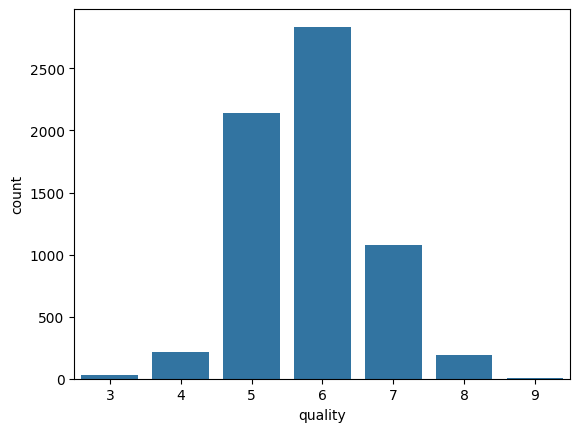

In [110]:
#vado ad ossevare la distribuzione di vini in base alla qualità per decidere un eventuale pulizia dei dati.
#decido di tenere tutti i record di vini acnhe quelli che hanno una 'quality' <4 e >8 nonostante non sisano molti.
#faccio ciò per offrire una consistenza maggiore e reale al modello
sns.countplot(x=df_vini['quality'])
plt.show()


In [111]:
#prima di proseguire con lo sviluppo del modeello, decido di eliminare la colonna total_sulfur_dioxide
df_vini=df_vini.drop('total_sulfur_dioxide', axis=1)
display(df_vini)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,0.99680,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,0.99700,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,0.99800,3.16,0.58,9.8,6,0
4,7.4,0.70,0.00,1.9,0.076,11.0,0.99780,3.51,0.56,9.4,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,0.99114,3.27,0.50,11.2,6,1
6493,6.6,0.32,0.36,8.0,0.047,57.0,0.99490,3.15,0.46,9.6,5,1
6494,6.5,0.24,0.19,1.2,0.041,30.0,0.99254,2.99,0.46,9.4,6,1
6495,5.5,0.29,0.30,1.1,0.022,20.0,0.98869,3.34,0.38,12.8,7,1


In [112]:
#in questo passaggio vado a creare la colonna top_quality alla quale assegenremo un valore pari a 0 se la quality del vino che andremo 
# a inserire è minore del valore soglia 6.5,. Se la qualità è maggiore di 6.5 a top_quality verrà assegnato il valore 1.
df_vini['top_quality']=[1 if x> 6.5 else 0 for x in df_vini.quality]
display(df_vini)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,density,pH,sulphates,alcohol,quality,type,top_quality
0,7.4,0.70,0.00,1.9,0.076,11.0,0.99780,3.51,0.56,9.4,5,0,0
1,7.8,0.88,0.00,2.6,0.098,25.0,0.99680,3.20,0.68,9.8,5,0,0
2,7.8,0.76,0.04,2.3,0.092,15.0,0.99700,3.26,0.65,9.8,5,0,0
3,11.2,0.28,0.56,1.9,0.075,17.0,0.99800,3.16,0.58,9.8,6,0,0
4,7.4,0.70,0.00,1.9,0.076,11.0,0.99780,3.51,0.56,9.4,5,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,0.99114,3.27,0.50,11.2,6,1,0
6493,6.6,0.32,0.36,8.0,0.047,57.0,0.99490,3.15,0.46,9.6,5,1,0
6494,6.5,0.24,0.19,1.2,0.041,30.0,0.99254,2.99,0.46,9.4,6,1,0
6495,5.5,0.29,0.30,1.1,0.022,20.0,0.98869,3.34,0.38,12.8,7,1,1


In [113]:

# Esporto il df in formato csv
#df_wine.to_csv(path, index=False) 
#in principio volevo scaricare il df_vini all'interno dell'apposita cartella csv del mio progetto (dentificata dalla variabile path), come scitto nella riga di codice precedente, tuttavia
#non disponendo dei permessi necessari il file appena scaricato l'ho caricato sul mio github
#perciò creerò il db dal link del file di github

#df_vini.to_csv('vini4.csv')
#files.download('vini4.csv')
#ho caricato vini4 su github

In [114]:
#importo le librerie necessarie per lo sviluppo del modello di predizione
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score

In [115]:
# Selezione delle features e della colonna target
features = df_vini.drop(['quality', 'top_quality'], axis=1)
target = df_vini['top_quality']

# split di training e testing delle features e del target conconseguente shape delle tuple di training e testing
x_train, x_test, y_train, y_test = train_test_split(
    features, target, test_size=0.2, random_state=40)
x_train.shape, x_test.shape

((5197, 11), (1300, 11))

In [116]:
# Normalizzazione dei valori di training e di testing utilizzando il MinMaxScaler di sklearn
norm = MinMaxScaler()
xtrain = norm.fit_transform(x_train)
xtest = norm.transform(x_test)
#print(xtrain)
#print(xtest)

In [117]:
# inizializzazione del modello di regressione logistica
logistic_model = LogisticRegression()

# training  modello
logistic_model.fit(xtrain, y_train)

# previsione test
y_pred_logistic = logistic_model.predict(xtest)

#attraverso la libreria accuracy_score di sklearn vado a definire la precisone del  modello
accuracy = accuracy_score(y_test, y_pred_logistic)
print('model precision:', accuracy)

# calcolo errore quadrato medio
mse = mean_squared_error(y_test, y_pred_logistic)
print('mean squared error:', mse)

# definizione di r2
r2 = r2_score(y_test, y_pred_logistic)
print('R2:', r2)

model precision: 0.7961538461538461
mean squared error: 0.20384615384615384
R2: -0.23876303487953976


In [118]:
#poichè ho riscontrato problemi nell'utilizzo della libreria sklearn2pmml ho optato per l'utilizzo 
#della libreria joblib

# iomporto la libreria joblib per salvare il modello addestrato
import joblib

# valorizzo il modello e lo inserisco nella cartella appropriata del progetto
# salvo il modello con un messaggio di conferma
top_quality_model = "C:\\Users\\icts22-24.323\\Desktop\\py_finale\\modello"
joblib.dump(logistic_model,top_quality_model)
print(f"file salvato!: {top_quality_model}")

#poichè lavoro su macchina virtuale, non detenendo  i permessi necessari ho scaricato il file di colab a mano e 
#inserito nella cartella apposita

PermissionError: [Errno 13] Permission denied: 'C:\\Users\\icts22-24.323\\Desktop\\py_finale\\modello'